<a href="https://colab.research.google.com/github/aryachandrak/Machine-Learning-2024-Ganjil/blob/main/Kuis1_boilerplate_AryaChandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

Pada kuis ini, Anda diminta untuk melakukan klasifikasi citra wajah dengan menggunakan dataset Labeled Face in Wild (LFW).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Setiap label dari dataset LFW harus berisikan minimal 10 gambar (5 poin)
2. Citra yang digunakan merupakan citra RGB / color (5 poin)
3. (Opsional) Lakukan proses pra pengolahan data jika diperlukan (ekstra 10 poin)
4. (Wajib) Gunakan fitur histogram untuk setiap channel citra (35 poin)
5. (Wajib) Gunakan algoritma SVM sebagai model dasar (35 poin)
6. (Wajib) Gunakan metric akurasi, dan *classification report* untuk melihat performa model (20 poin)

## Challenge
Setelah menyelesaikan kuis berdasarkan spesifikasi wajib, Anda diperkenankan untuk

- Menggunakan fitur lain selain histogram (ekstra 20 poin)
- Menggunakan model lain selain SVM (ekstra 10 poin)
- Evalusi dengan metric lain ataupun report dengan *confusion matrix* (ekstra 10 poin)

# Boilerplate

Berikut merupakan boilerplate code yang dapat Anda gunakan sebagai acuan dasar pengerjaan kuis.
Anda diperkenankan untuk **menambah** ataupun **mengurangi** bagian boilerplate yang disediakan.

---

# Preparation

In [1]:
# Load required library
# Import Required Library
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

# Load Data

In [2]:
# Load Dataset
# We will load dataset only for faces with contain min 10 images
# We also want to keep images in color; color=True
faces = fetch_lfw_people(min_faces_per_person=10, color=True)

# Check Faces
print(f'Total Label: {len(faces.target_names)}')
print(f'Data dimension: {faces.images.shape}')
print(f'Images flatten dimension: {faces.data.shape}')

Total Label: 158
Data dimension: (4324, 62, 47, 3)
Images flatten dimension: (4324, 8742)


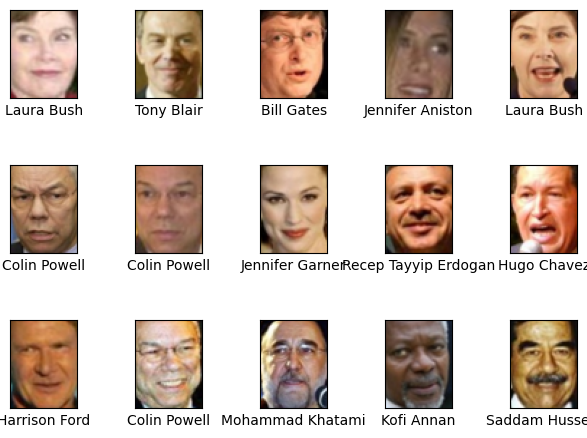

In [3]:
# Check by Plotted Images
# Generate random 15 images
rand_labels = [np.random.randint(0, len(faces.data)) for x in range(0,15)]

fig, ax = plt.subplots(3, 5)
fig.tight_layout()
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[rand_labels[i]], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[rand_labels[i]]])

# Preprocessing

In [ ]:
'''
    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,

    1. Standardisasi nilai fitur ataupun label
    2. Penyesuaian ukuran gambar
    3. Perubahan colorspace gambar
    4. dsb
'''

'\n    Pada bagian ini Anda diperbolehkan untuk melakukan proses pra pengolahan data (preprocessing) sesuai dengan kebutuhan. Pra pengolahan data dapat berupa,\n\n    1. Standardisasi nilai fitur ataupun label\n    2. Penyesuaian ukuran gambar\n    3. Perubahan colorspace gambar\n    4. dsb\n'

In [5]:
#Digunakan untuk visualisasi histogram

images_uint8 = np.zeros_like(faces.images, dtype=np.uint8)
for i in range(len(faces.images)):
    images_uint8[i] = (faces.images[i] * 255).astype(np.uint8)

# Features Extraction

In [ ]:
'''
    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.
    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.

    Hints:
        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,
        Anda dapat menggunakan fungsi np.histrogram dari library numpy
'''

'\n    Pada bagian ini, lakukan proses ekstraksi fitur yang diminta, yaitu histogram tiap channel.\n    Terdapat banyak cara untuk melakukan ekstraksi fitur histrogram.\n\n    Hints:\n        Salah satu cara untuk melakukan ekstraksi fitur histrogram adalah,\n        Anda dapat menggunakan fungsi np.histrogram dari library numpy\n'

In [ ]:
#Fitur Histogram

# def extract_histogram_features(image):
#     # Menghitung histogram untuk setiap channel (R, G, B)
#     hist_r, _ = np.histogram(image[:, :, 0], bins=256, range=(0, 1))
#     hist_g, _ = np.histogram(image[:, :, 1], bins=256, range=(0, 1))
#     hist_b, _ = np.histogram(image[:, :, 2], bins=256, range=(0, 1))
#     # Normalisasi histogram dengan membagi dengan total piksel
#     hist_r = hist_r / hist_r.sum()
#     hist_g = hist_g / hist_g.sum()
#     hist_b = hist_b / hist_b.sum()
#     # Menggabungkan histogram channel R, G, dan B menjadi satu vektor fitur
#     return np.concatenate((hist_r, hist_g, hist_b))

# # Ekstraksi fitur histogram untuk semua gambar
# X_hist = np.array([extract_histogram_features(img) for img in faces.images])
# y = faces.target


In [14]:
#Challenge Histogram dan LBP
from skimage.feature import hog
from skimage import exposure
from skimage import img_as_ubyte  # Konversi float32 ke uint8

# Fungsi untuk mengekstrak fitur histogram RGB
def extract_histogram_features(image):
    hist_r, _ = np.histogram(image[:, :, 0], bins=256, range=(0, 256))
    hist_g, _ = np.histogram(image[:, :, 1], bins=256, range=(0, 256))
    hist_b, _ = np.histogram(image[:, :, 2], bins=256, range=(0, 256))

    # hist_r = hist_r / hist_r.sum()
    # hist_g = hist_g / hist_g.sum()
    # hist_b = hist_b / hist_b.sum()

    return np.concatenate((hist_r, hist_g, hist_b))

# Feature untuk extract HOG Feature
def extract_hog_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')
    return features

# Ekstraksi fitur kombinasi untuk semua gambar
X_hog = np.array([extract_hog_features(img) for img in faces.images])

# Gunakan faces.target sebagai y
y = faces.target


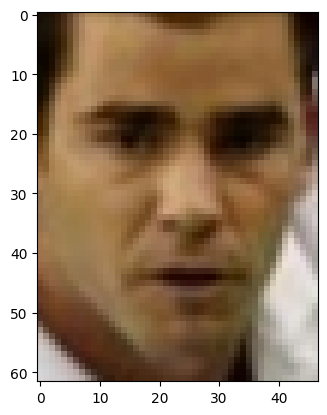

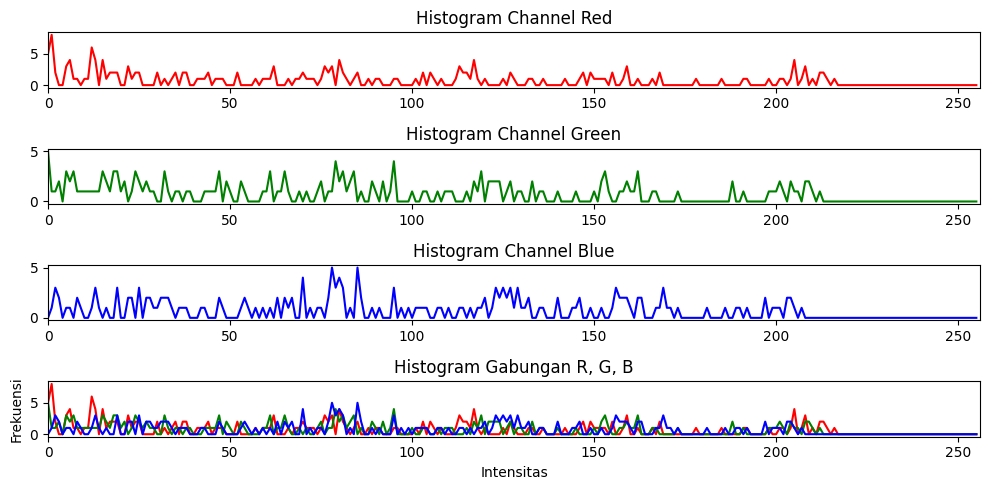

In [10]:
#Visualisasi Data Histogram

#Test Random Image
rand_image = [np.random.randint(0, len(faces.images))]
plt.imshow(faces.images[rand_image[0]])

# Menghitung histogram untuk setiap channel
hist_r, _ = np.histogram(images_uint8[rand_image[0], :, 0], bins=256, range=(0, 255))
hist_g, _ = np.histogram(images_uint8[rand_image[0], :, 1], bins=256, range=(0, 255))
hist_b, _ = np.histogram(images_uint8[rand_image[0], :, 2], bins=256, range=(0, 255))

# Membuat subplot untuk visualisasi histogram
plt.figure(figsize=(10, 5))

# Histogram untuk channel Red
plt.subplot(4, 1, 1)
plt.plot(hist_r, color='red')
plt.title('Histogram Channel Red')
plt.xlim([0, 256])

# Histogram untuk channel Green
plt.subplot(4, 1, 2)
plt.plot(hist_g, color='green')
plt.title('Histogram Channel Green')
plt.xlim([0, 256])

# Histogram untuk channel Blue
plt.subplot(4, 1, 3)
plt.plot(hist_b, color='blue')
plt.title('Histogram Channel Blue')
plt.xlim([0, 256])

#Histogram Gabungan
plt.subplot(4, 1, 4)
plt.plot(hist_r, color='red')
plt.plot(hist_g, color='green')
plt.plot(hist_b, color='blue')
plt.title('Histogram Gabungan R, G, B')
plt.xlabel('Intensitas')
plt.ylabel('Frekuensi')
plt.xlim([0, 256])

# Menampilkan histogram
plt.tight_layout()
plt.show()


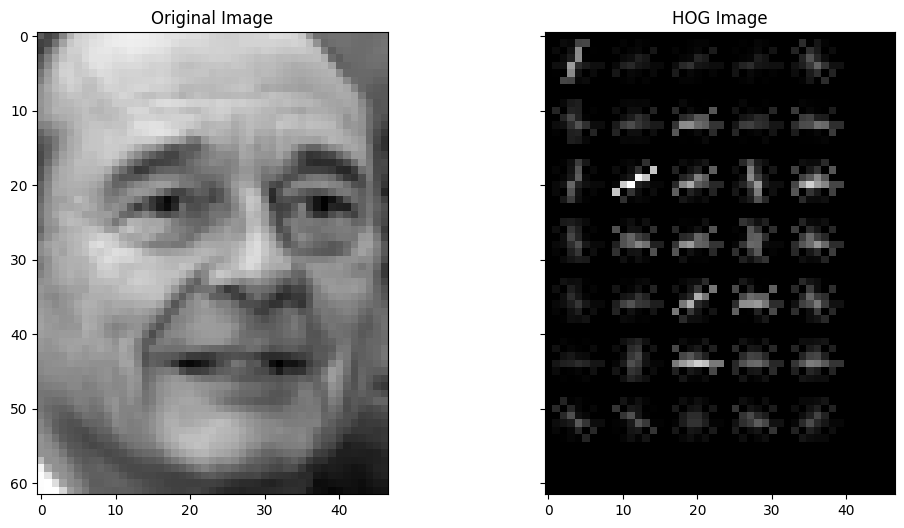

In [22]:
gray_image = cv2.cvtColor(faces.images[0], cv2.COLOR_RGB2GRAY)
features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Rescale HOG image for better contrast
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot original and HOG images
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax[0].imshow(gray_image, cmap=plt.cm.gray)
ax[0].set_title('Original Image')

ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax[1].set_title('HOG Image')

plt.show()

In [ ]:

# # Membuat subplot untuk visualisasi histogram
# plt.figure(figsize=(10, 5))

# # Histogram untuk semua channel dalam satu plot
# plt.plot(hist_r, color='red', label='Red')
# plt.plot(hist_g, color='green', label='Green')
# plt.plot(hist_b, color='blue', label='Blue')

# plt.title('Histogram Gabungan R, G, B')
# plt.xlabel('Intensitas')
# plt.ylabel('Frekuensi')
# plt.xlim([0, 256])
# plt.legend()

# # Menampilkan histogram
# plt.tight_layout()
# plt.show()


# Build Model

In [ ]:
'''
    Pada bagian ini lakukan proses pembuatan model,

    1. Pembuatan data training dan data testing
    2. Pembuatan objek model
    3. Proses fitting model
'''

In [ ]:
# def check_class_balance(y):
#     unique_classes, class_counts = np.unique(y, return_counts=True)
#     jumlah=0
#     print("Distribusi Kelas:")
#     for cls, count in zip(unique_classes, class_counts):
#         print(f"Kelas: {cls}, Jumlah: {count}")
#         jumlah=jumlah+count
#     # Cek apakah ada kelas yang mendominasi
#     if np.max(class_counts) / np.min(class_counts) > 2:
#         print("Perhatian: Terdapat ketidakseimbangan kelas.")
#         print(f"Jumlah Kelas: {jumlah}")
#     else:
#         print("Kelas seimbang.")


# # Panggil fungsi untuk memeriksa keseimbangan kelas
# check_class_balance(y)


In [15]:
# Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.3, random_state=42)


In [16]:
# Build SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [18]:
# Challenge Model
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluation

In [ ]:
'''
    Pada bagian ini, lakukan evaluasi terhadap data training dan data testing
    dengan menggunakan metric akurasi dan juga classfication report

    Hints:
        Anda dapat menggunakan referensi Jobseet 4 Percobaan 5
'''

In [20]:
# Prediction and Evaluation
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification Report
# Set zero_division to 1 to avoid UndefinedMetricWarning
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=faces.target_names, zero_division=1))


Accuracy: 23.50%
Classification Report:
                           precision    recall  f1-score   support

             Abdullah Gul       1.00      0.17      0.29         6
             Adrien Brody       0.00      0.00      0.00         2
         Alejandro Toledo       0.00      0.00      0.00         7
             Alvaro Uribe       1.00      0.00      0.00        11
          Amelie Mauresmo       1.00      0.00      0.00         7
             Andre Agassi       0.00      0.00      0.00         4
             Andy Roddick       0.00      0.00      0.00         5
           Angelina Jolie       0.00      0.00      0.00         3
              Ann Veneman       1.00      0.00      0.00         3
          Anna Kournikova       1.00      0.00      0.00         3
            Ari Fleischer       1.00      0.00      0.00         5
             Ariel Sharon       0.19      0.20      0.20        20
    Arnold Schwarzenegger       1.00      0.00      0.00        21
     Atal Bihari Vajp